In [0]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
boston.data.shape

(506, 13)

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
boston_df = pd.DataFrame(boston.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df.columns = boston.feature_names
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


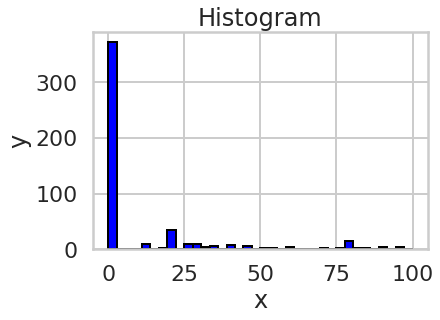

In [15]:
plt.hist(boston_df['ZN'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

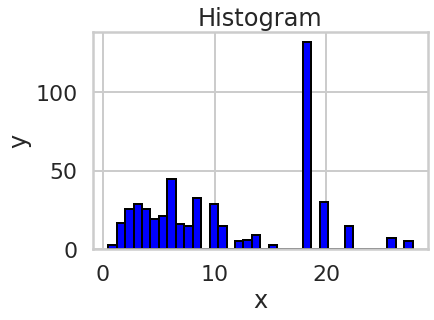

In [16]:
plt.hist(boston_df['INDUS'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

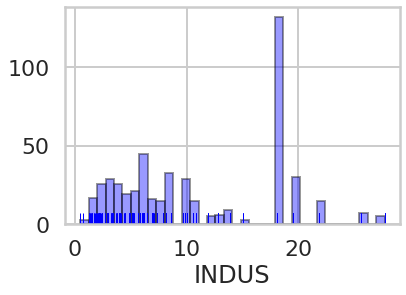

In [19]:
sns.distplot(boston_df['INDUS'], hist=True, kde=False, rug=True,
             bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

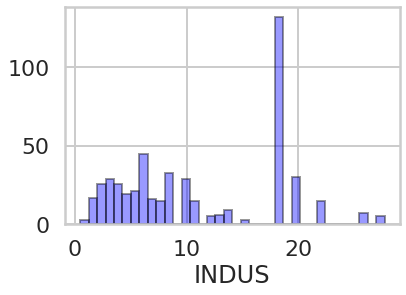

In [21]:
sns.distplot(boston_df['INDUS'], hist=True, kde=False, rug=False,
             bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

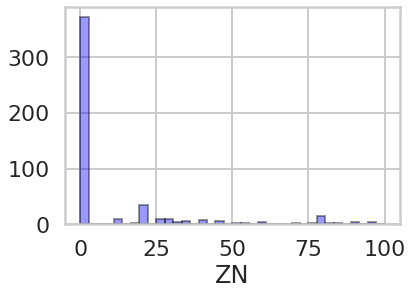

In [22]:
sns.distplot(boston_df['ZN'], hist=True, kde=False, rug=False,
             bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

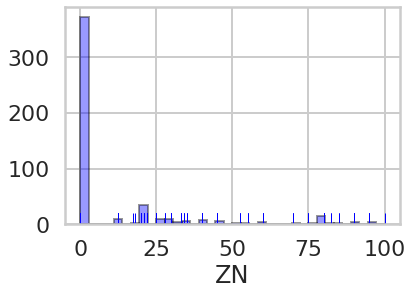

In [23]:
sns.distplot(boston_df['ZN'], hist=True, kde=False, rug=True,
             bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

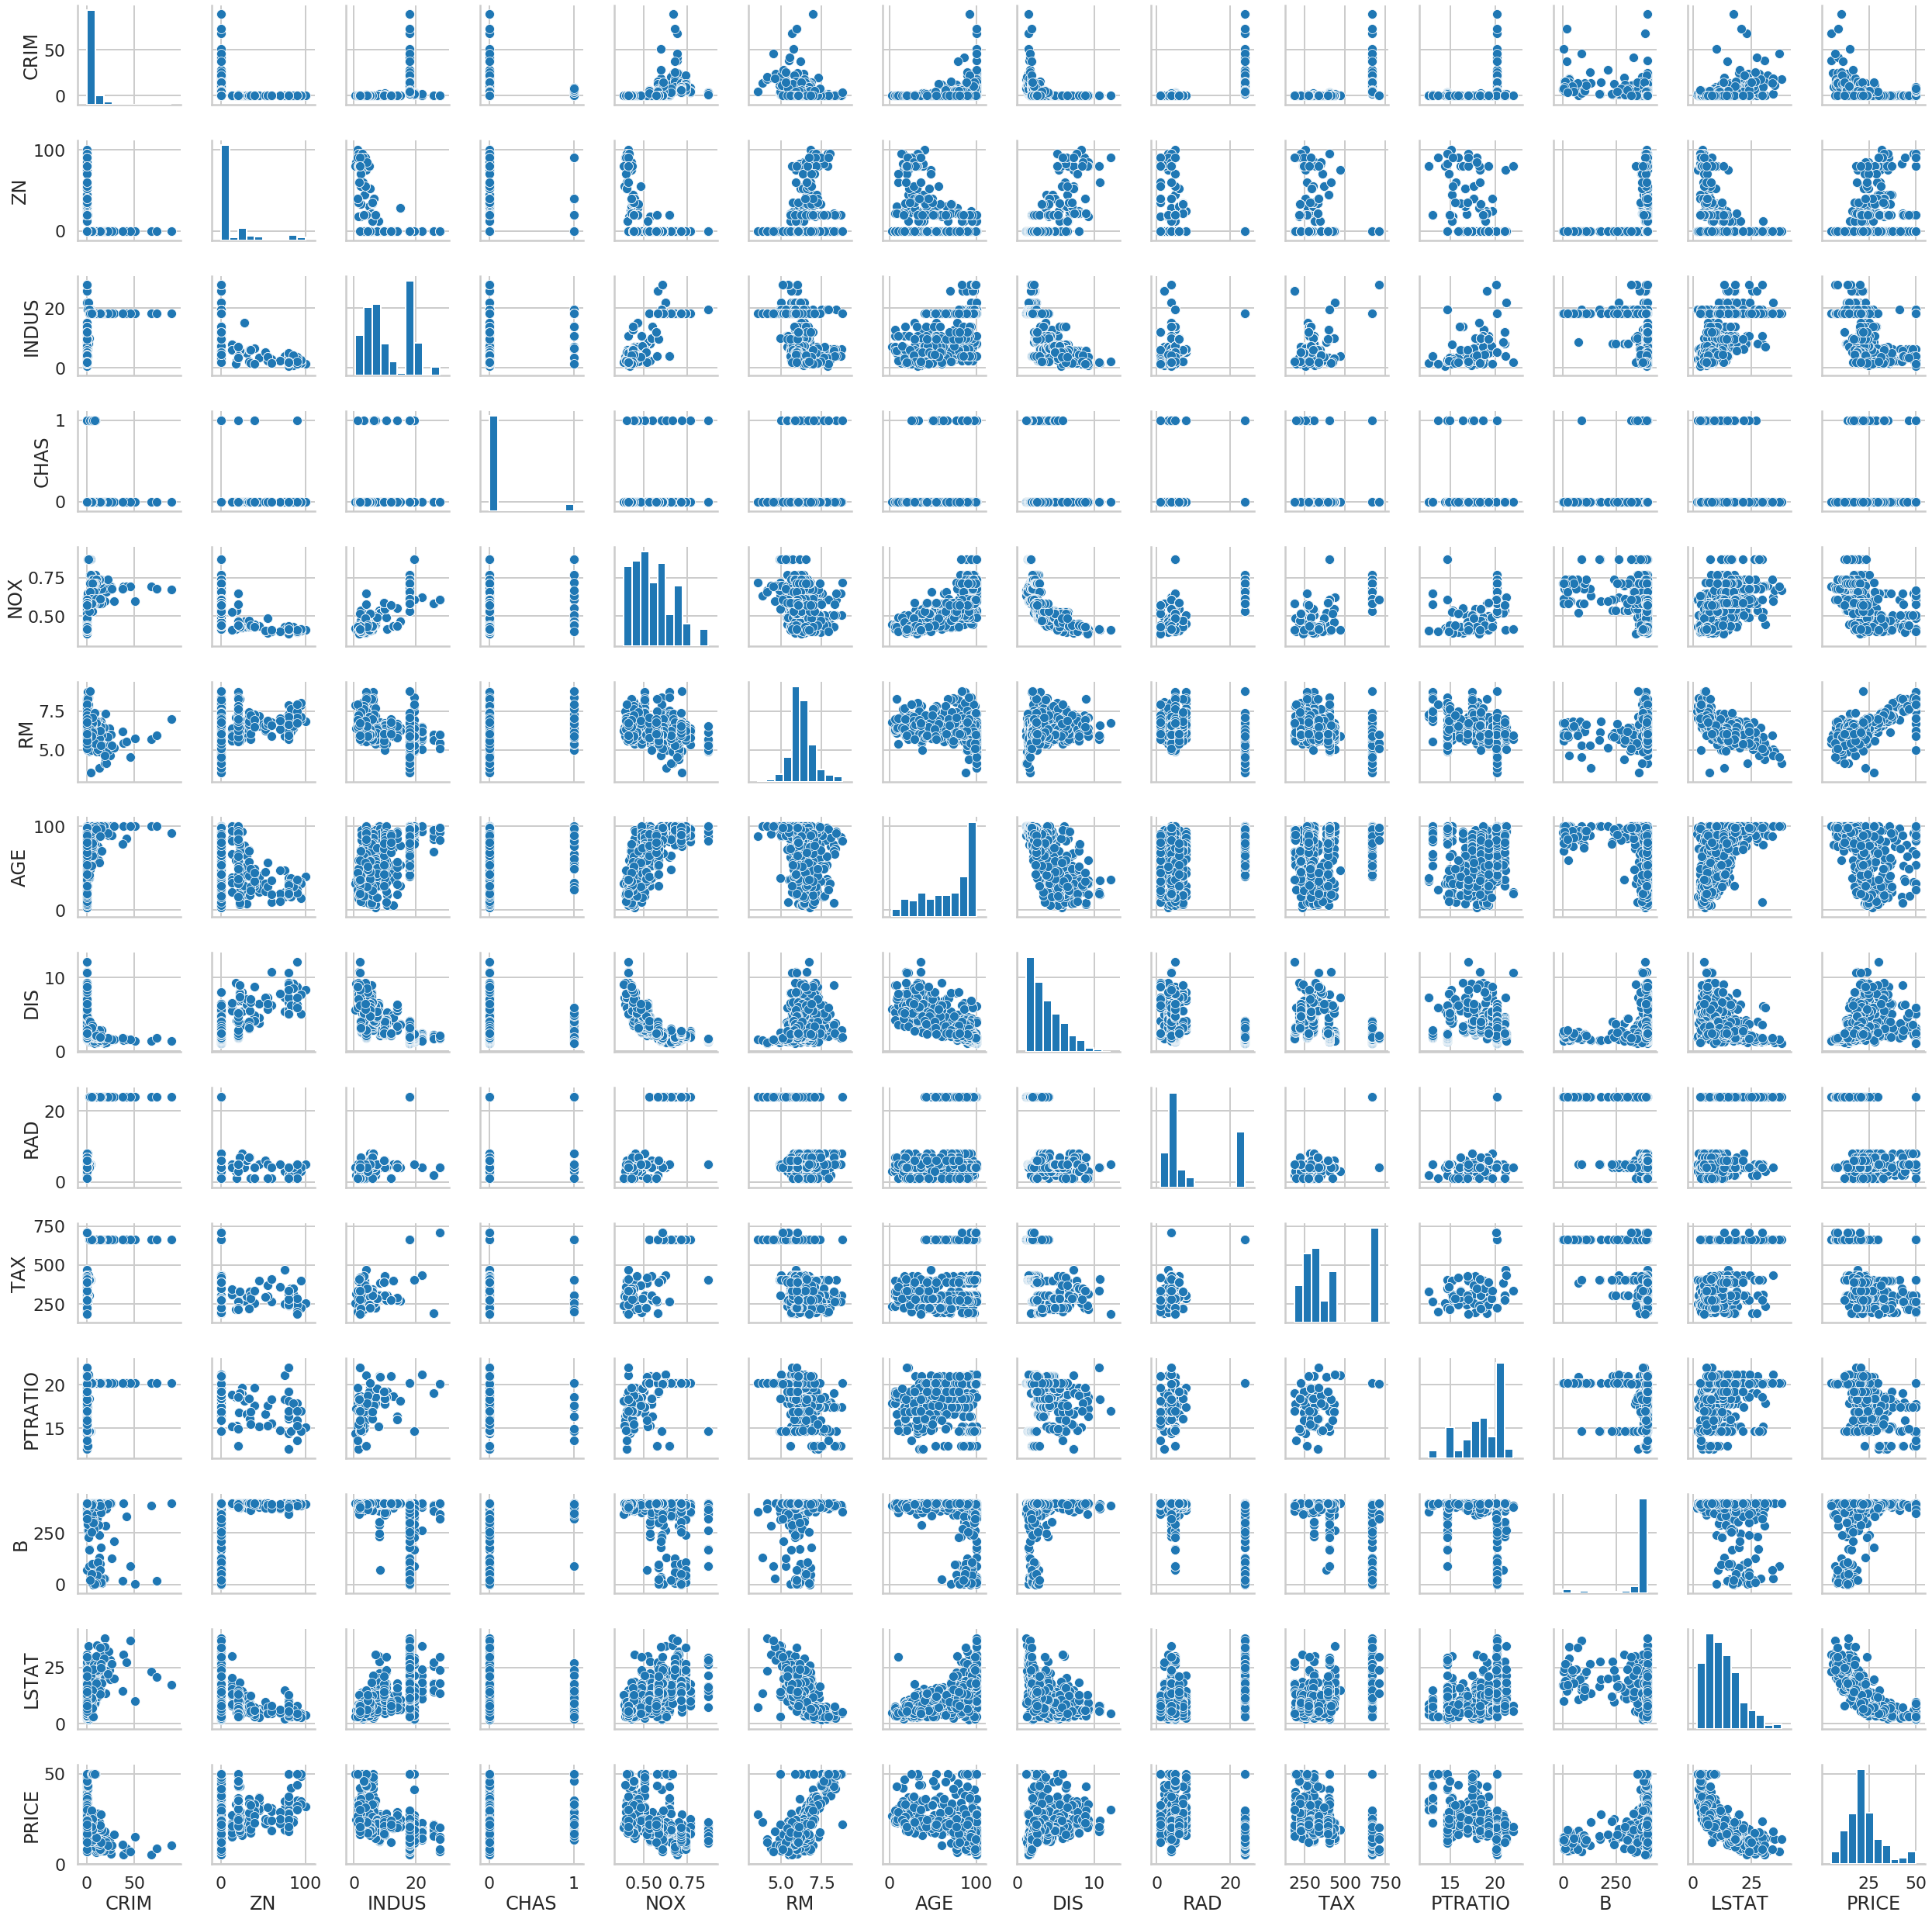

In [24]:
sns.pairplot(boston_df)

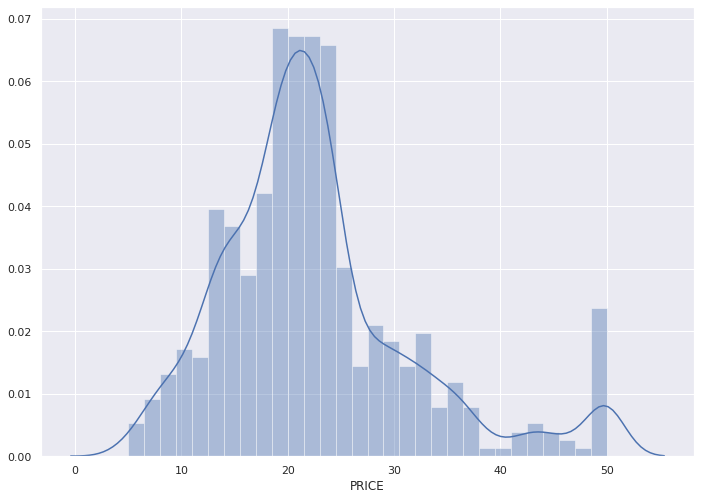

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_df['PRICE'], bins=30)
plt.show()

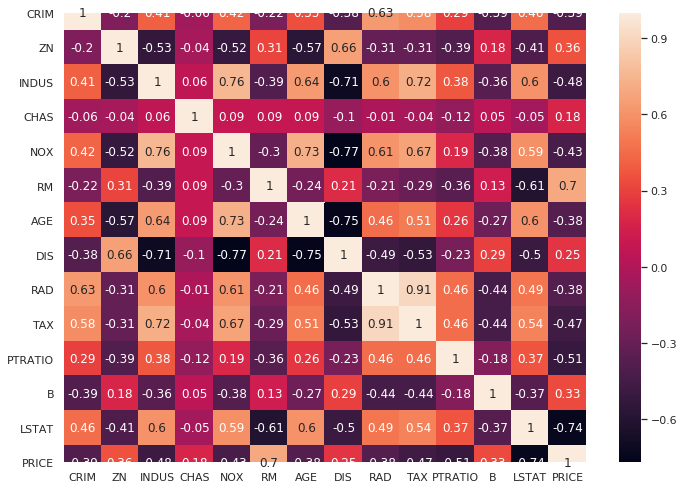

In [27]:
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

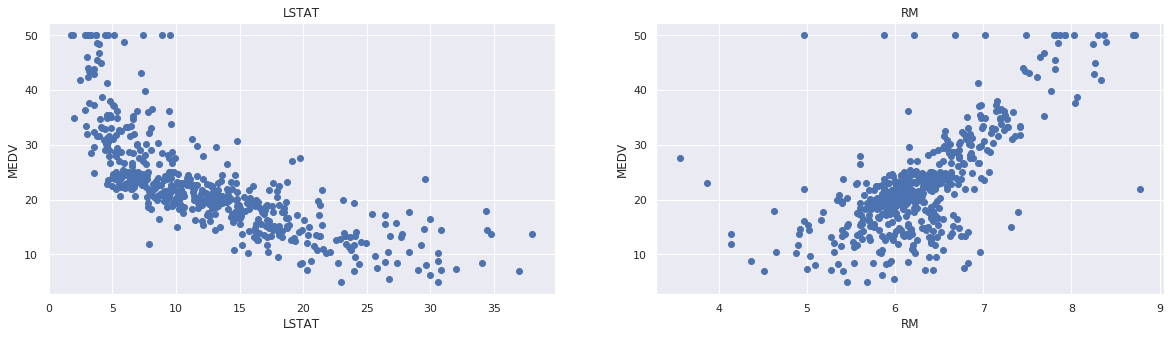

In [29]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')



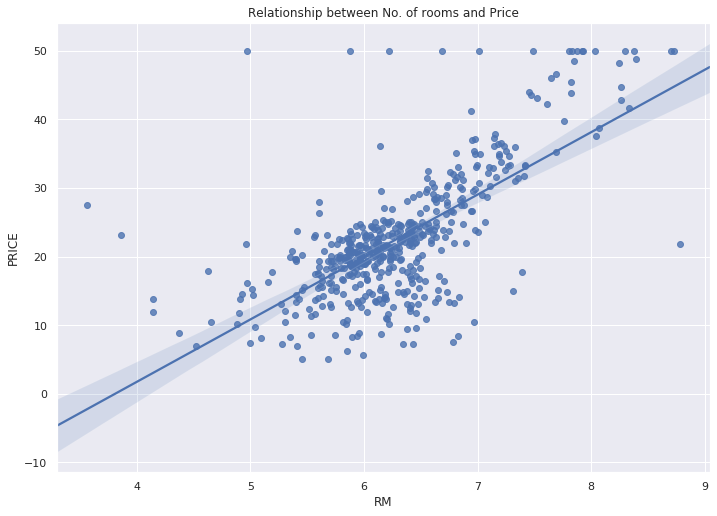

In [30]:
sns.regplot(x="RM",y="PRICE", data=boston_df, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()



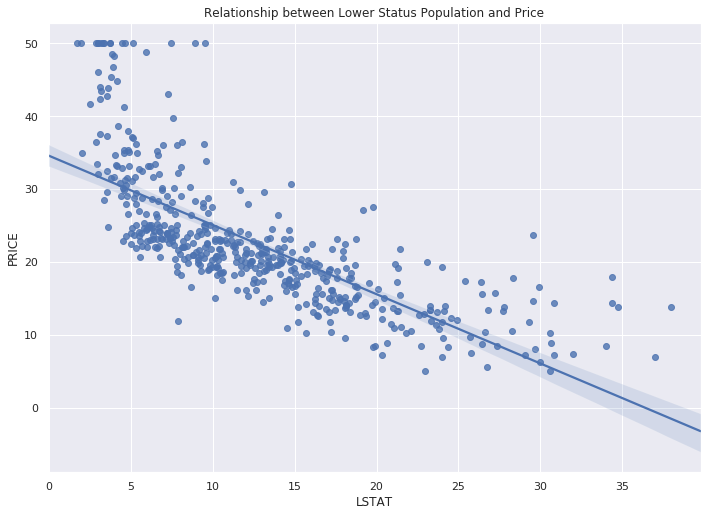

In [31]:
sns.regplot(y="PRICE",x="LSTAT", data=boston_df, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

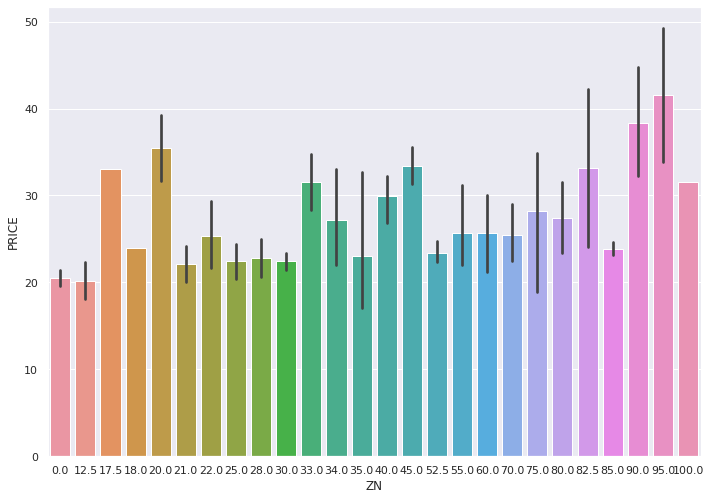

In [38]:
sns.barplot(x="ZN",y="PRICE", data=boston_df)

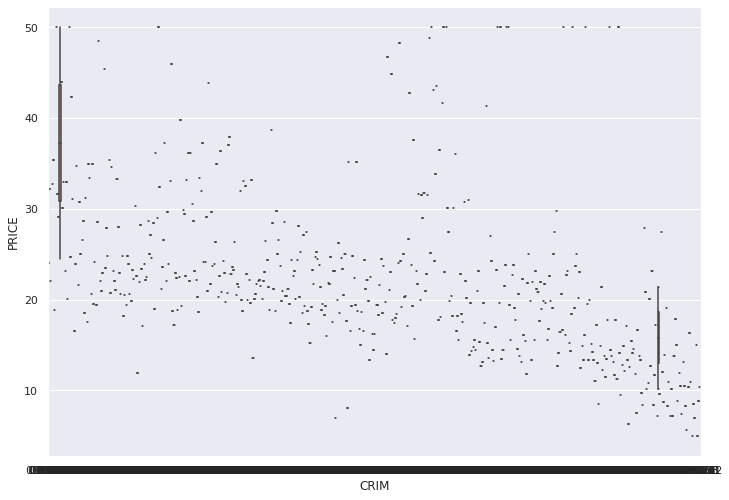

In [39]:
sns.boxplot(x="CRIM",y="PRICE", data=boston_df)

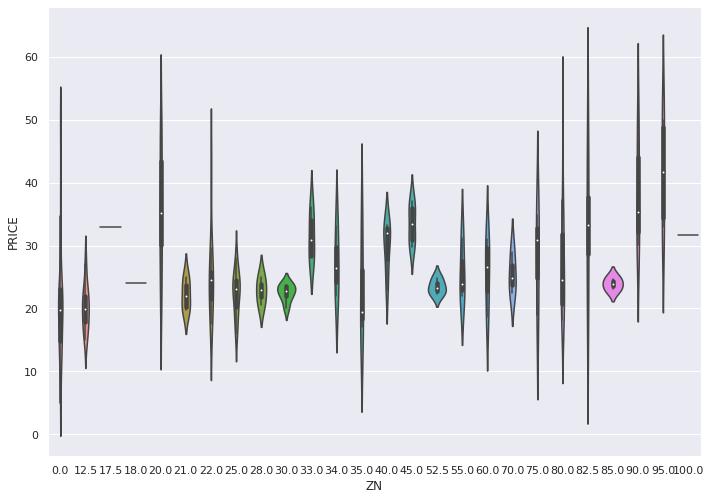

In [40]:
sns.violinplot(x="ZN",y="PRICE", data=boston_df)